C:\Users\uthay\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


✅ Model loaded successfully
Found 3043 images belonging to 10 classes.


C:\Users\uthay\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 555ms/step
✅ Classification Report:

              precision    recall  f1-score   support

     battery       0.90      0.83      0.86       143
  biological       0.95      0.95      0.95       151
   cardboard       0.86      0.89      0.88       279
     clothes       0.97      0.98      0.98       800
       glass       0.90      0.87      0.88       481
       metal       0.66      0.82      0.73       162
       paper       0.81      0.81      0.81       269
     plastic       0.84      0.77      0.81       315
       shoes       0.94      0.97      0.95       298
       trash       0.77      0.71      0.74       145

    accuracy                           0.89      3043
   macro avg       0.86      0.86      0.86      3043
weighted avg       0.89      0.89      0.89      3043



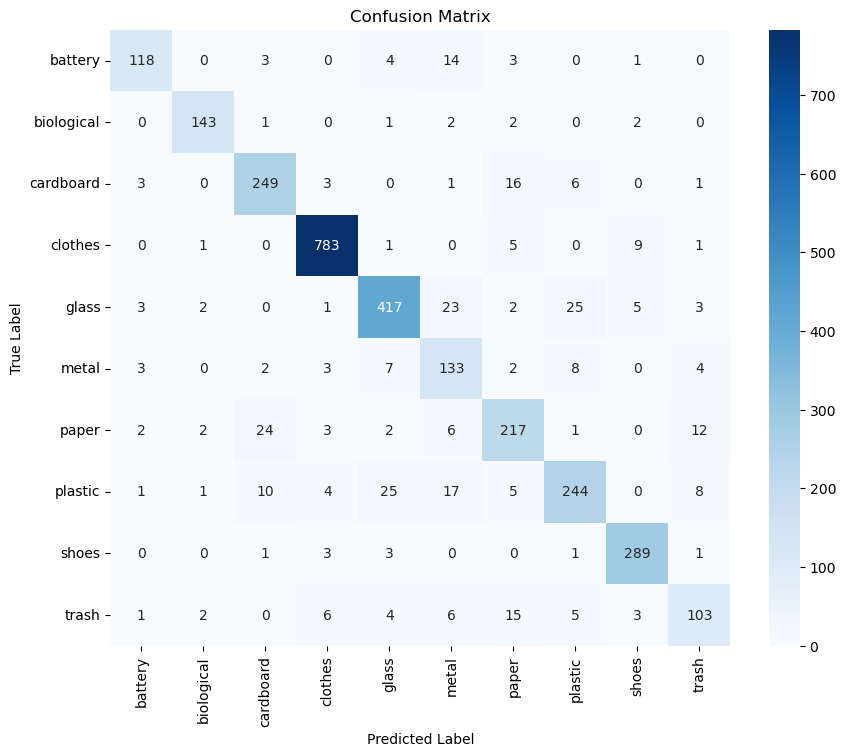

✅ Predictions saved to predictions.csv


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# ------------------------------
# 1️⃣ Load saved model
# ------------------------------
MODEL_PATH = "models/best_model.keras"
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully")

# ------------------------------
# 2️⃣ Load test data
# ------------------------------
TEST_DIR = r"C:/Users/uthay/Desktop/cv-waste-classification/data/processed/test"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# ------------------------------
# 3️⃣ Get predictions
# ------------------------------
test_data.reset()
preds = model.predict(test_data)
pred_labels = np.argmax(preds, axis=1)
true_labels = test_data.classes
class_labels = list(test_data.class_indices.keys())

# ------------------------------
# 4️⃣ Classification report
# ------------------------------
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print("✅ Classification Report:\n")
print(report)

# ------------------------------
# 5️⃣ Confusion Matrix
# ------------------------------
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ------------------------------
# 6️⃣ Save predictions to CSV
# ------------------------------
filenames = test_data.filenames
df_preds = pd.DataFrame({
    "Filename": filenames,
    "True_Label": [class_labels[i] for i in true_labels],
    "Predicted_Label": [class_labels[i] for i in pred_labels]
})
df_preds.to_csv("predictions.csv", index=False)
print("✅ Predictions saved to predictions.csv")
